# Final Project: Stellar Classification: Explore Features Engineering

## Exploring Data

In [1]:
#import needed libraries
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from tqdm import tqdm
from fast_ml.model_development import train_valid_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

from itertools import cycle

import matplotlib

import seaborn as sns

import statsmodels.api as sm

In [2]:
df = pd.read_csv("star_classification.csv")
df.drop(index=79543, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99995,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99996,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99997,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [3]:
Counter(df['class'])

Counter({'GALAXY': 59445, 'QSO': 18961, 'STAR': 21593})

In [4]:
dict(Counter(df['class'])).values()

dict_values([59445, 18961, 21593])

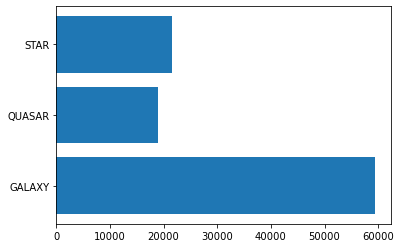

In [5]:
# create dataset
height = dict(Counter(df['class'])).values()
bars = ('GALAXY','QUASAR', 'STAR')
y_pos = np.arange(len(bars))

plt.barh(y_pos, height)

plt.yticks(y_pos, bars)
plt.show()

In [6]:
stellar_df = df[['u','g','r','i','z','redshift','class']]
stellar_df

,u,g,r,i,z,redshift,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...
99994,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
99995,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
99996,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
99997,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


In [7]:
stellar_dfapp = df[['u','g','r','i','z','redshift']]
stellar_dfapp

,u,g,r,i,z,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123
...,...,...,...,...,...,...
99994,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000
99995,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895
99996,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366
99997,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040


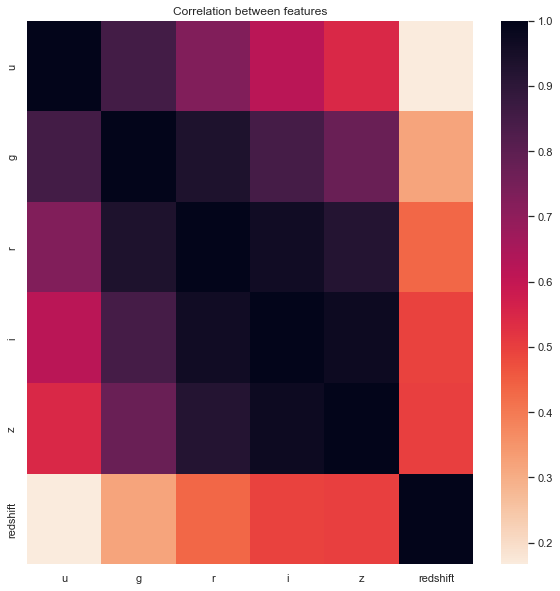

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
plot_ = sns.heatmap(stellar_dfapp.corr(), xticklabels=stellar_dfapp.columns, yticklabels=stellar_dfapp.columns, cmap = "rocket_r")
plot_.set(title='Correlation between features')
plt.show()

In [9]:
tempdf = stellar_df.drop(['class'], axis=1)

In [10]:
stellar_df.sort_index(inplace=True)
tempdf.sort_index(inplace=True)

In [11]:
scaler = preprocessing.MinMaxScaler()
scaled_tempdf = scaler.fit_transform(tempdf)
tempcol=list(tempdf.columns)
scaled_df = pd.DataFrame(scaled_tempdf, columns=tempcol)
scaled_df.sort_index(inplace=True)
scaled_df['class'] = stellar_df['class']
scaled_df.head()

,u,g,r,i,z,redshift,class
0,0.591347,0.558050,0.535344,0.427665,0.464377,0.091831,GALAXY
1,0.632603,0.584423,0.646203,0.515986,0.607035,0.112389,GALAXY
2,0.654888,0.576463,0.546218,0.435729,0.472194,0.093170,GALAXY
3,0.511384,0.629186,0.596946,0.486717,0.487460,0.134210,GALAXY
4,0.387463,0.335579,0.337999,0.287021,0.300043,0.017959,GALAXY


In [12]:
# Split data into train and test sets
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(scaled_df, target = 'class', 
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)
#X_train, X_test, y_train, y_test = train_test_split(X, y)
Counter(y_train)
stellar_dict = dict(Counter(y_train))
stellar_dict

{'GALAXY': 41610, 'QSO': 13274, 'STAR': 15115}

It's clear that where are dealing with an imbalanced dataset, we need to balance the dataset using the random oversampling method.

In [13]:
random_os = RandomOverSampler(random_state=1)
X_train_oversampled, y_train_oversampled = random_os.fit_resample(X_train, y_train)
Counter(y_train_oversampled)

Counter({'GALAXY': 41610, 'QSO': 41610, 'STAR': 41610})

In [14]:
y_train_oversampled

0         GALAXY
1         GALAXY
2         GALAXY
3         GALAXY
4         GALAXY
           ...  
124825      STAR
124826      STAR
124827      STAR
124828      STAR
124829      STAR
Name: class, Length: 124830, dtype: object

Let's create another X_train and y_train dataset without outliers. We will use the IQR method to remove them.

In [64]:
X_train.columns

Index(['u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')

In [68]:
upper_limits = []
lower_limits = []
for col in X_train.columns:
    p25 = X_train[col].quantile(0.25)
    p75 = X_train[col].quantile(0.75)
    iqr = p75-p25
    upper_limits.append(p75 + 1.5*iqr)
    lower_limits.append(p25 - 1.5*iqr)




In [76]:
X_train_no_outliers = X_train[(X_train['u'] > lower_limits[0]) & (X_train['u'] < upper_limits[0]) & (X_train['g'] > lower_limits[1]) & (X_train['g'] < upper_limits[1]) & (X_train['r'] > lower_limits[2]) & (X_train['r'] < upper_limits[2]) & (X_train['i'] > lower_limits[3]) & (X_train['i'] < upper_limits[3]) & (X_train['z'] > lower_limits[4]) & (X_train['z'] < upper_limits[4]) & (X_train['redshift'] > lower_limits[5]) & (X_train['redshift'] < upper_limits[5])]

In [82]:
ind = X_train_no_outliers.index.to_list()
y_train_no_outliers = y_train[ind]
len(X_train_no_outliers) == len(y_train_no_outliers)

True

In [83]:
random_os = RandomOverSampler(random_state=1)
X_train_no_outliers_oversampled, y_train_no_outliers_oversampled = random_os.fit_resample(X_train_no_outliers, y_train_no_outliers)
Counter(y_train_no_outliers_oversampled)

Counter({'GALAXY': 41403, 'STAR': 41403, 'QSO': 41403})

### Multinomial Logistic regression oversampled

In [15]:
# Train the Logistic Regression Model using the resampled data
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none', max_iter=100000)
model.fit(X_train_oversampled, y_train_oversampled)

LogisticRegression(max_iter=100000, multi_class='multinomial', penalty='none')

In [16]:
y_pred = model.predict(X_train_oversampled)
print("Balanced Accuracy for training set:", balanced_accuracy_score(y_train_oversampled, y_pred))
print("Accuracy for trainining set:", accuracy_score(y_train_oversampled, y_pred))

Balanced Accuracy for training set: 0.9559320676119523
Accuracy for trainining set: 0.9559320676119523


In [17]:
y_pred = model.predict(X_valid)
print("Balanced Accuracy for validation set:", balanced_accuracy_score(y_valid, y_pred))
print("Accuracy for validation set:", accuracy_score(y_valid, y_pred))

Balanced Accuracy for validation set: 0.958877115893025
Accuracy for validation set: 0.9560666666666666


In [18]:
y_pred = model.predict(X_test)
print("Balanced Accuracy for test set:", balanced_accuracy_score(y_test, y_pred))
print("Accuracy for test set:", accuracy_score(y_test, y_pred))

Balanced Accuracy for test set: 0.9538137018683117
Accuracy for test set: 0.9522666666666667


In [19]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

     GALAXY       0.97      0.95      0.96      0.96      0.95      0.91      8983
        QSO       0.86      0.91      0.97      0.89      0.94      0.88      2787
       STAR       0.98      1.00      0.99      0.99      1.00      0.99      3230

avg / total       0.95      0.95      0.97      0.95      0.96      0.92     15000



Text(73.7, 0.5, 'Predicted label')

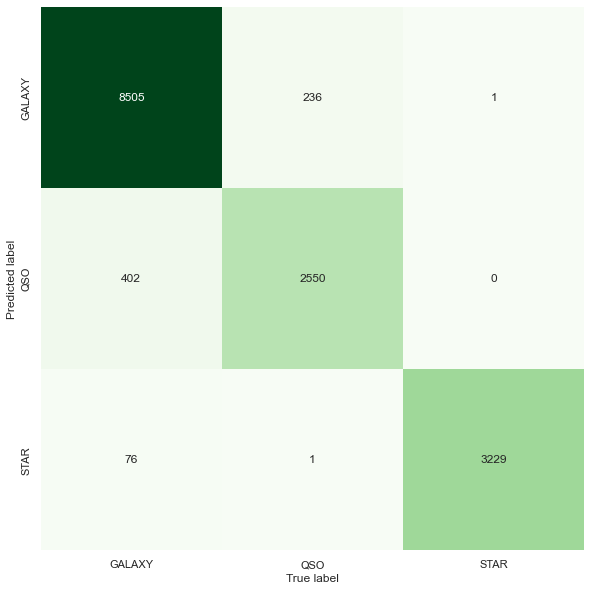

In [20]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Greens",
            xticklabels=['GALAXY', 'QSO', 'STAR'], yticklabels=['GALAXY', 'QSO', 'STAR'])
sns.set(rc={'figure.figsize':(8,8)})
plt.xlabel('True label')
plt.ylabel('Predicted label')

Now let's repeat the analysis on the dataset without outliers.

In [84]:
# Train the Logistic Regression Model using the resampled data without outliers
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none', max_iter=100000)
model.fit(X_train_no_outliers_oversampled, y_train_no_outliers_oversampled)

LogisticRegression(max_iter=100000, multi_class='multinomial', penalty='none')

In [85]:
y_pred = model.predict(X_train_no_outliers_oversampled)
print("Balanced Accuracy for training set:", balanced_accuracy_score(y_train_no_outliers_oversampled, y_pred))
print("Accuracy for trainining set:", accuracy_score(y_train_no_outliers_oversampled, y_pred))

Balanced Accuracy for training set: 0.9365746443494433
Accuracy for trainining set: 0.9365746443494433


In [86]:
y_pred = model.predict(X_valid)
print("Balanced Accuracy for validation set:", balanced_accuracy_score(y_valid, y_pred))
print("Accuracy for validation set:", accuracy_score(y_valid, y_pred))

Balanced Accuracy for validation set: 0.9575035764184915
Accuracy for validation set: 0.9452666666666667


In [87]:
y_pred = model.predict(X_test)
print("Balanced Accuracy for test set:", balanced_accuracy_score(y_test, y_pred))
print("Accuracy for test set:", accuracy_score(y_test, y_pred))

Balanced Accuracy for test set: 0.9534117421631413
Accuracy for test set: 0.942


### ROC curve without oversampling

In [17]:
classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [18]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(80000, 3)

In [30]:
class_of_interest = "STAR"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

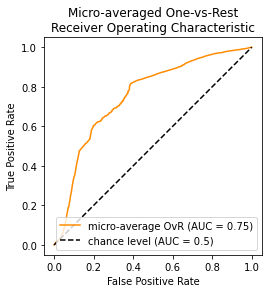

In [31]:
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [33]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [35]:
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.61


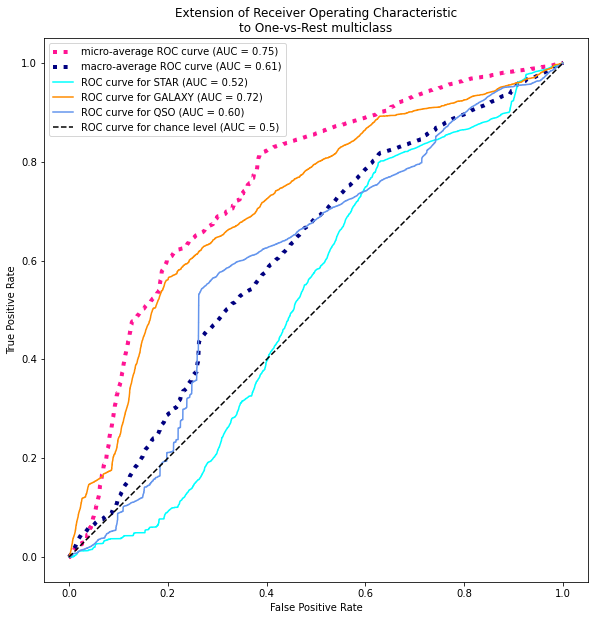

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

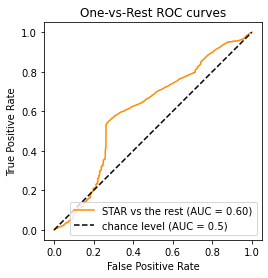

In [32]:
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

### ROC curve in case of oversampling

In [21]:
target_names = ['STAR', 'GALAXY', 'QSO']

In [22]:
classifier = LogisticRegression()
y_score = classifier.fit(X_train_oversampled, y_train_oversampled).predict_proba(X_test)

In [23]:
label_binarizer = LabelBinarizer().fit(y_train_oversampled)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(15000, 3)

In [24]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [25]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(3):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= 3

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.98


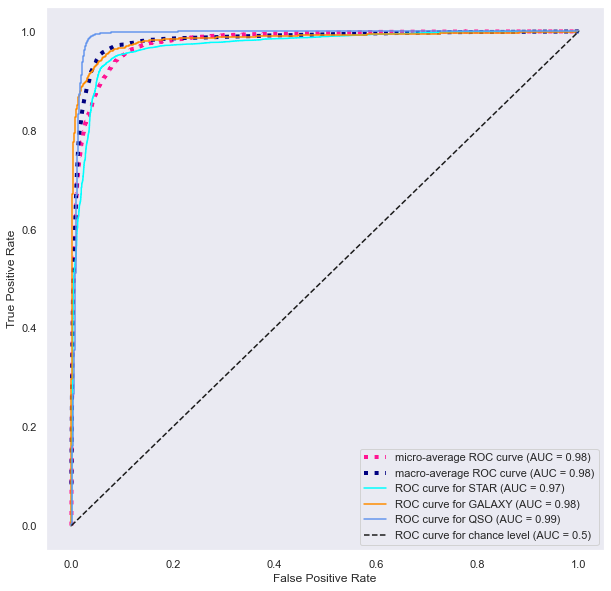

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.grid(False)
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
#plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

We observe a huge improvement in performance respect to the previous ROC curve obtained without oversampling.

## KNN

In [27]:
k_range = [i for i in range(1,100) if (i%3!=0)]
accuracy_list = []
balanced_accuracy_list = []
for k in tqdm(k_range): 
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train_oversampled, y_train_oversampled)
    y_pred = classifier.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_pred, y_test))
    balanced_accuracy_list.append(metrics.balanced_accuracy_score(y_pred, y_test, adjusted = True))

100%|██████████| 66/66 [01:52<00:00,  1.71s/it]


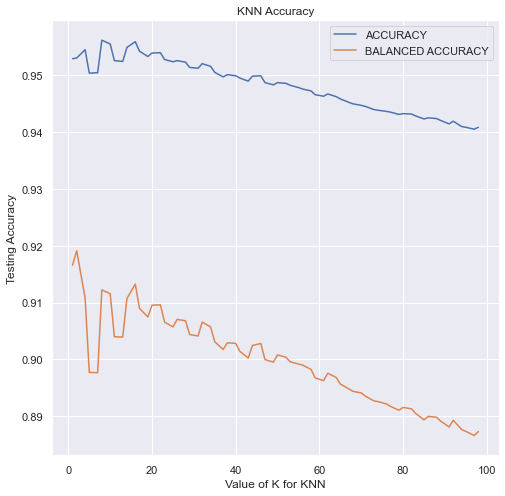

In [28]:
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

plt.plot(k_range, accuracy_list, label = "ACCURACY")
plt.plot(k_range, balanced_accuracy_list, label = "BALANCED ACCURACY")
plt.title('KNN Accuracy')
plt.legend()
plt.show()

In [29]:
k = 10
classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(X_train_oversampled, y_train_oversampled)
y_pred = classifier.predict(X_valid)
balanced_accuracy_score(y_pred, y_valid, adjusted = True)

0.915158008334385

Now let's repeat the analysis with the dataset that excluded outleirs.

In [88]:
k_range = [i for i in range(1,100) if (i%3!=0)]
accuracy_list = []
balanced_accuracy_list = []
for k in tqdm(k_range): 
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train_no_outliers_oversampled, y_train_no_outliers_oversampled)
    y_pred = classifier.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_pred, y_test))
    balanced_accuracy_list.append(metrics.balanced_accuracy_score(y_pred, y_test, adjusted = True))

100%|██████████| 66/66 [02:00<00:00,  1.83s/it]


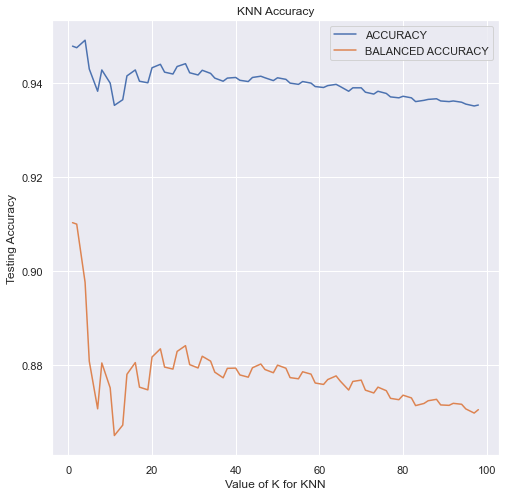

In [89]:
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

plt.plot(k_range, accuracy_list, label = "ACCURACY")
plt.plot(k_range, balanced_accuracy_list, label = "BALANCED ACCURACY")
plt.title('KNN Accuracy')
plt.legend()

plt.show()

In [93]:
k = 28
classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(X_train_oversampled, y_train_oversampled)
y_pred = classifier.predict(X_valid)
balanced_accuracy_score(y_pred, y_valid, adjusted = True)

0.9059558161407157

## PCA

In [30]:
PCAdf = pd.read_csv("star_classification.csv")
PCAdf.drop(index=79543, inplace=True)
PCAdf.reset_index(drop=True, inplace=True)
PCAdf

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99995,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99996,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99997,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [31]:
stellar_PCAdf = PCAdf[['u','g','r','i','z','redshift']]
stellar_PCAdf

,u,g,r,i,z,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123
...,...,...,...,...,...,...
99994,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000
99995,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895
99996,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366
99997,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040


In [32]:
scaled_data= StandardScaler().fit_transform(stellar_PCAdf)

In [33]:
pca = PCA(n_components=3)
df_pca_done = pca.fit(scaled_data)
df_pca_done = pca.transform(scaled_data)

In [34]:
100 * pca.explained_variance_ratio_

array([74.96742451, 15.62253051,  7.25791866])

In [35]:
col_names = ['PC_'+ str(i) for i in range(1,len(pca.explained_variance_ratio_)+1)]
principal_df = pd.DataFrame(data = df_pca_done
             , columns = col_names)

In [36]:
principal_df

,PC_1,PC_2,PC_3
0,-0.881330,-0.549265,0.561923
1,-2.959793,-0.324154,-0.318209
2,-1.332205,-0.868270,0.875164
3,-1.786858,0.051244,-0.037998
4,3.632447,0.047656,0.384345
...,...,...,...
99994,-1.958115,-0.700049,-1.323036
99995,-0.957834,-0.468667,-0.186023
99996,1.658577,-0.285806,0.074488
99997,-0.735606,-0.992542,0.872425


In [37]:
PCAdf.sort_index(inplace=True)

In [38]:
#Now we append the class to the principal components dataframe
principal_df['class'] = np.array(PCAdf['class'])
principal_df

,PC_1,PC_2,PC_3,class
0,-0.881330,-0.549265,0.561923,GALAXY
1,-2.959793,-0.324154,-0.318209,GALAXY
2,-1.332205,-0.868270,0.875164,GALAXY
3,-1.786858,0.051244,-0.037998,GALAXY
4,3.632447,0.047656,0.384345,GALAXY
...,...,...,...,...
99994,-1.958115,-0.700049,-1.323036,GALAXY
99995,-0.957834,-0.468667,-0.186023,GALAXY
99996,1.658577,-0.285806,0.074488,GALAXY
99997,-0.735606,-0.992542,0.872425,GALAXY


In [39]:
Counter(principal_df['class'])

Counter({'GALAXY': 59445, 'QSO': 18961, 'STAR': 21593})

### Logistic regression on PCA model

In [40]:
# Split data into train and test sets
X_trainP, y_trainP, X_validP, y_validP, X_testP, y_testP = train_valid_test_split(principal_df, target = 'class', 
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)

Counter(y_trainP)
stellar_dictP = dict(Counter(y_trainP))
stellar_dictP

{'GALAXY': 41627, 'QSO': 13279, 'STAR': 15093}

In [41]:
random_os = RandomOverSampler(random_state=1)
X_trainP_oversampled, y_trainP_oversampled = random_os.fit_resample(X_trainP, y_trainP)
Counter(y_trainP_oversampled)

Counter({'GALAXY': 41627, 'QSO': 41627, 'STAR': 41627})

In [42]:
# Train the Logestic Regression Model using the resampled data
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none', max_iter=100000)
model.fit(X_trainP_oversampled, y_trainP_oversampled)

LogisticRegression(max_iter=100000, multi_class='multinomial', penalty='none')

In [47]:
y_predP = model.predict(X_validP)
print("Balanced Accuracy for validation set", balanced_accuracy_score(y_validP, y_predP))
print("Accuracy for validation set:", accuracy_score(y_validP, y_predP))

Balanced Accuracy for validation set 0.9510342113291649
Accuracy for validation set: 0.9476


In [46]:
print(classification_report_imbalanced(y_testP,y_predP))

                   pre       rec       spe        f1       geo       iba       sup

     GALAXY       0.59      0.57      0.43      0.58      0.49      0.25      8929
        QSO       0.18      0.20      0.80      0.19      0.39      0.15      2842
       STAR       0.21      0.23      0.77      0.22      0.42      0.16      3229

avg / total       0.44      0.43      0.57      0.43      0.46      0.21     15000



In [49]:
# Display the confusion matrix
cP = confusion_matrix(y_testP, y_predP)
cmrosP = pd.DataFrame(cP, index=["Actual - Galaxy", "Actual - QSO", "Actual - Star"], columns=["Predicted - Galaxy", "Predicted - QSO", "Predicted - Star"])
cmrosP

,Predicted - Galaxy,Predicted - QSO,Predicted - Star
Actual - Galaxy,5111,1801,2017
Actual - QSO,1633,555,654
Actual - Star,1846,654,729


Text(54.260000000000005, 0.5, 'Predicted label')

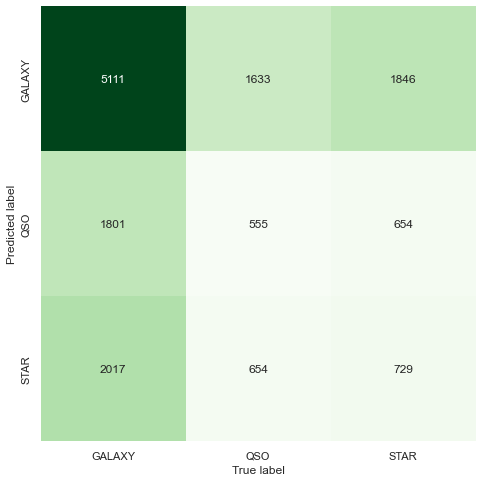

In [50]:
import seaborn as sns
matP = confusion_matrix(y_testP, y_predP)
sns.heatmap(matP.T, square=True, annot=True, fmt='d', cbar=False, cmap="Greens",
            xticklabels=['GALAXY', 'QSO', 'STAR'], yticklabels=['GALAXY', 'QSO', 'STAR'])
sns.set(rc={'figure.figsize':(8,8)})
plt.xlabel('True label')
plt.ylabel('Predicted label')

## Hypothesis: The redshift feature is enough to classify the stellar objects with good accuracy.

In [51]:
X_train_redshift = X_train_oversampled[['redshift']] 
X_train_redshift
X_test_redshift = X_test[['redshift']]

In [52]:
y_train_oversampled

0         GALAXY
1         GALAXY
2         GALAXY
3         GALAXY
4         GALAXY
           ...  
124825      STAR
124826      STAR
124827      STAR
124828      STAR
124829      STAR
Name: class, Length: 124830, dtype: object

In [53]:
# Train the Logestic Regression Model using the resampled data
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none', max_iter=100000)
model.fit(X_train_redshift, y_train_oversampled)

LogisticRegression(max_iter=100000, multi_class='multinomial', penalty='none')

In [55]:
y_pred_redshift = model.predict(X_test_redshift)
balanced_accuracy_score(y_test, y_pred_redshift)

0.9279689660317727

Training the MLR only with the redshift feature allows us to reach an accuracy of almost 93%. 

In [56]:
print(classification_report_imbalanced(y_test,y_pred_redshift))

                   pre       rec       spe        f1       geo       iba       sup

     GALAXY       0.95      0.93      0.93      0.94      0.93      0.87      8983
        QSO       0.81      0.86      0.95      0.83      0.90      0.81      2787
       STAR       0.98      1.00      0.99      0.99      1.00      0.99      3230

avg / total       0.93      0.93      0.95      0.93      0.94      0.88     15000



In [58]:
# Display the confusion matrix
cP = confusion_matrix(y_test, y_pred_redshift)
cmrosP = pd.DataFrame(cP, index=["Actual - Galaxy", "Actual - QSO", "Actual - Star"], columns=["Predicted - Galaxy", "Predicted - QSO", "Predicted - Star"])
cmrosP

,Predicted - Galaxy,Predicted - QSO,Predicted - Star
Actual - Galaxy,8344,564,75
Actual - QSO,403,2383,1
Actual - Star,0,0,3230


Text(54.260000000000005, 0.5, 'Predicted label')

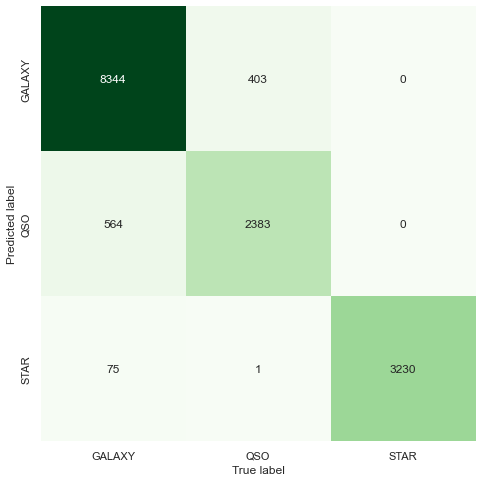

In [59]:
import seaborn as sns
matP = confusion_matrix(y_test, y_pred_redshift)
sns.heatmap(matP.T, square=True, annot=True, fmt='d', cbar=False, cmap="Greens",
            xticklabels=['GALAXY', 'QSO', 'STAR'], yticklabels=['GALAXY', 'QSO', 'STAR'])
sns.set(rc={'figure.figsize':(8,8)})
plt.xlabel('True label')
plt.ylabel('Predicted label')

### KNN on PCA dataset

In [60]:
accuracy_listpca = []
balanced_accuracy_listpca = []

for k in tqdm(k_range): 
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_trainP_oversampled, y_trainP_oversampled)
    y_predP = classifier.predict(X_testP)
    accuracy_listpca.append(metrics.accuracy_score(y_predP, y_testP))
    balanced_accuracy_listpca.append(metrics.balanced_accuracy_score(y_predP, y_testP))

100%|██████████| 66/66 [00:57<00:00,  1.15it/s]


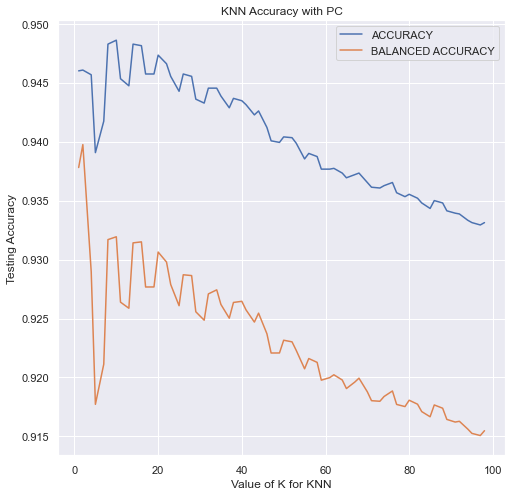

In [61]:
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

plt.plot(k_range, accuracy_listpca, label = "ACCURACY")
plt.title( 'KNN Accuracy with PC')
plt.plot(k_range, balanced_accuracy_listpca, label = "BALANCED ACCURACY")
plt.legend()
plt.show()

In [63]:
k = 8
classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(X_trainP_oversampled, y_trainP_oversampled)
y_predP = classifier.predict(X_validP)
balanced_accuracy_score(y_predP, y_validP, adjusted = True)

0.8977756160088227

### Visulization of the data using PCA 

In [ ]:
principal_df["class"] = [0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in principal_df["class"]]

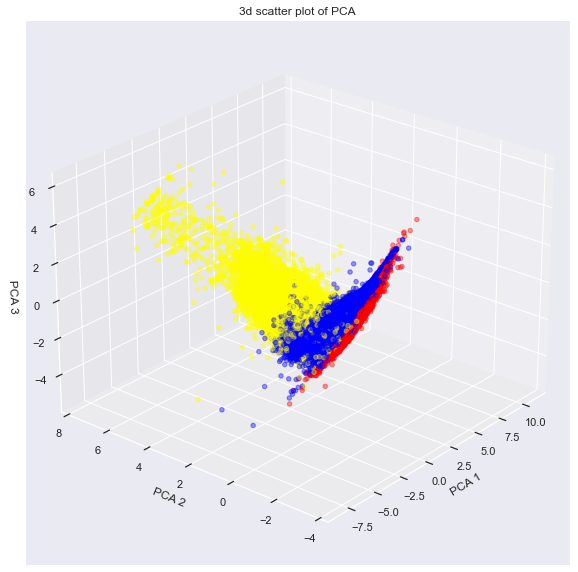

In [ ]:
fig = plt.figure(figsize=(16, 10))

ax = fig.add_subplot(projection='3d')

x = principal_df['PC_1'].values
y = principal_df['PC_2'].values
z = principal_df['PC_3'].values

ax = plt.axes(projection="3d")

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

colors = ["blue", "red", "yellow"]
plt.title("3d scatter plot of PCA")

ax.scatter(x, y, z  , c = principal_df['class'] , cmap=matplotlib.colors.ListedColormap(colors), alpha=0.4)

ax.view_init(25, -140)